# <font color='red'> # Stochastic Gradient Descent(SGD)
- This model optimizes the log-loss function using LBFGS(Quasi-Newton methods) or stochastic gradient descent.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

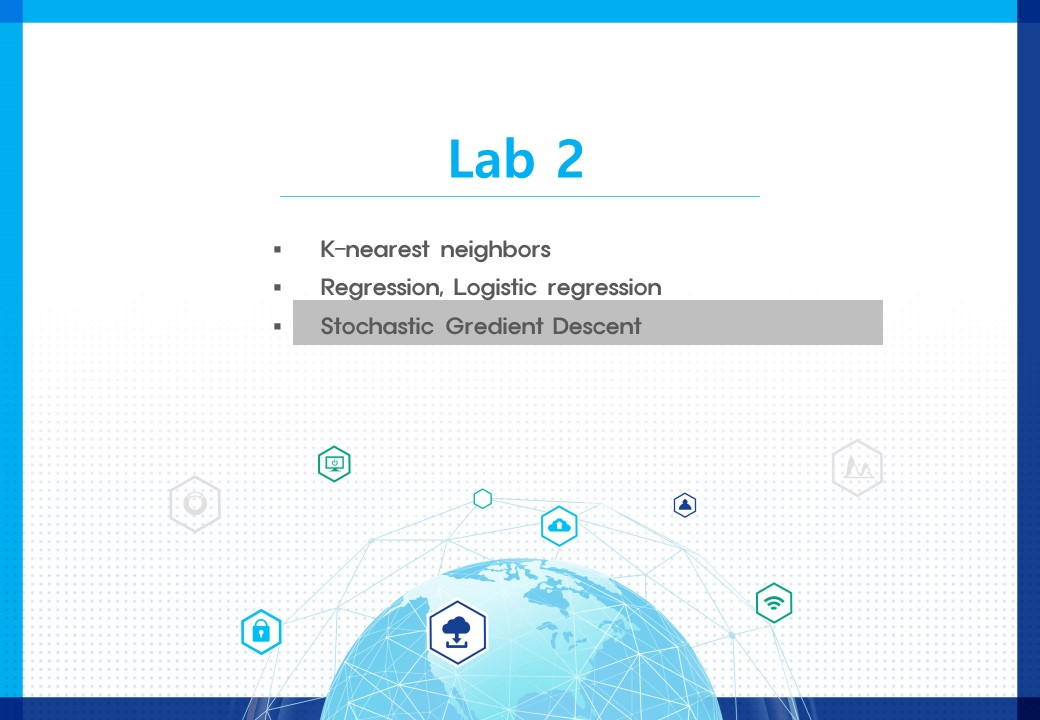

In [3]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')
from IPython.display import Image
width=800; height=500
Image(filename='슬라이드54.jpg', width=width, height=height)

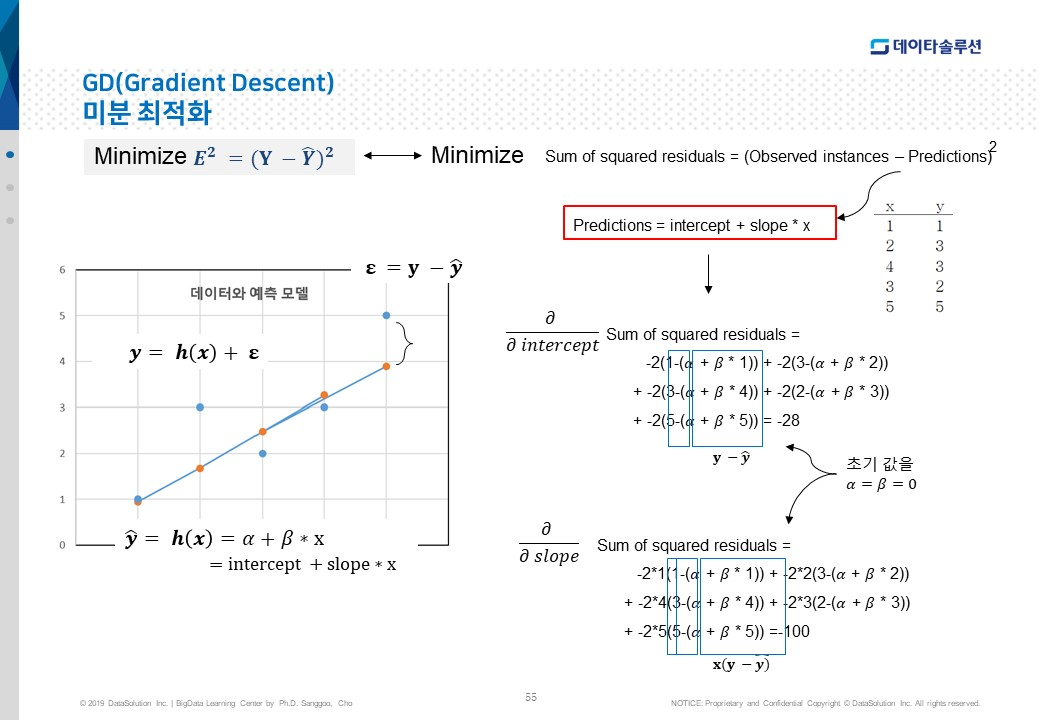

In [28]:
Image(filename='슬라이드55.jpg', width=1000, height=height)

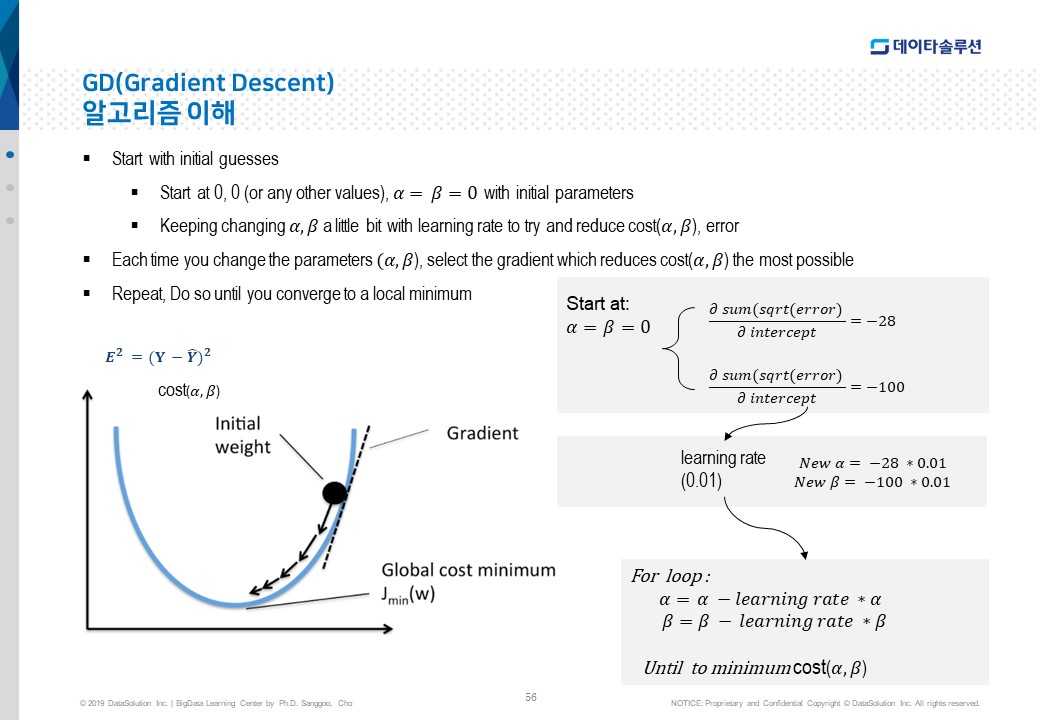

In [29]:
Image(filename='슬라이드56.jpg', width=1000, height=height)

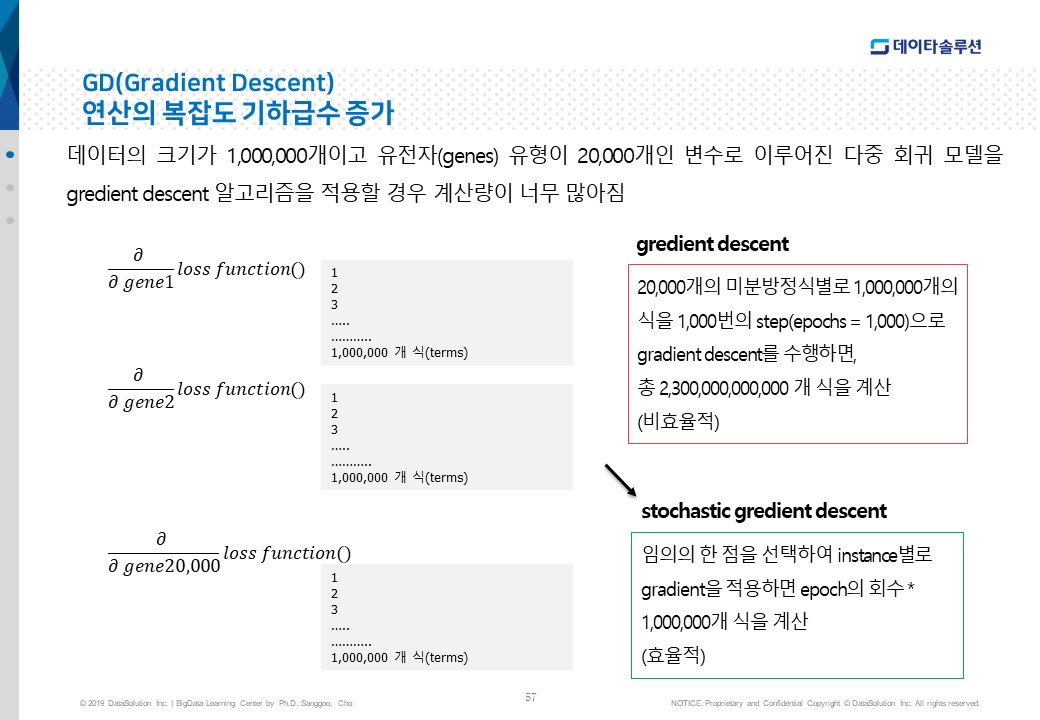

In [30]:
Image(filename='슬라이드57.jpg', width=1000, height=height)

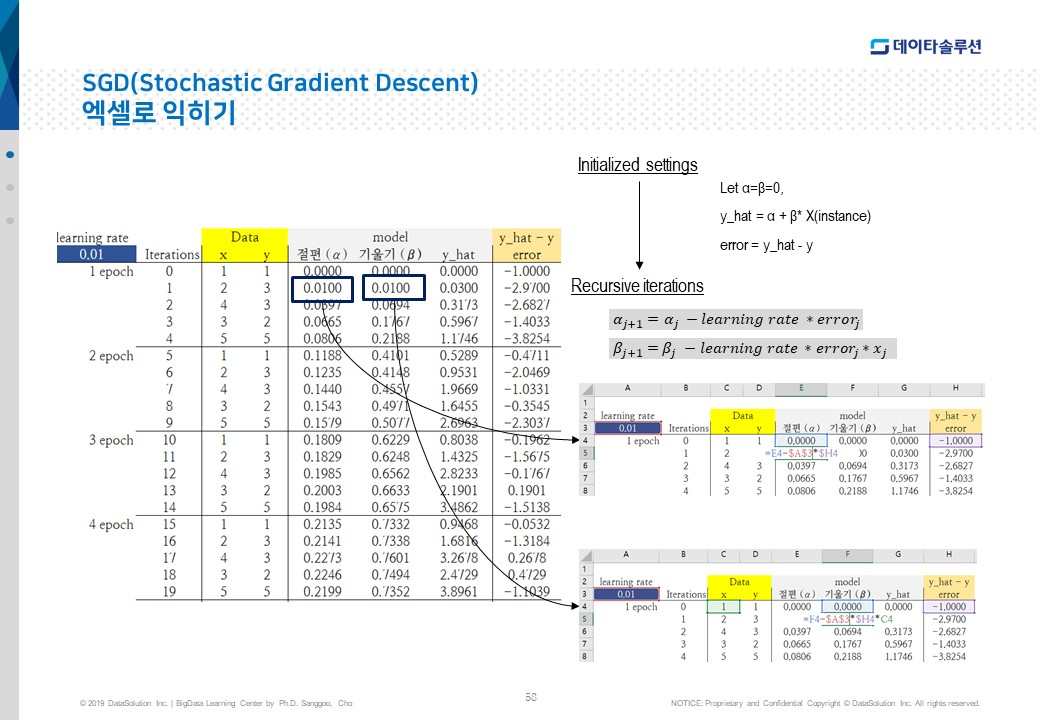

In [31]:
Image(filename='슬라이드58.jpg', width=1000, height=height)

## Data Generation

In [6]:
import pandas as pd
data = pd.DataFrame({'x': [1,2,4,3,5], 'y':[1,3,3,2,5]})
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


### max_iter을 5, 10, 15, 20으로 fitting 

SGDRegressor(max_iter=10)

SGDRegressor(max_iter=10)

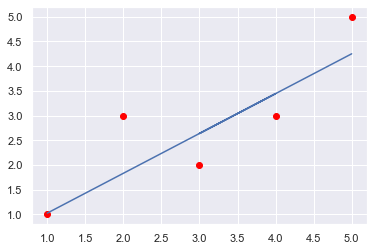

In [10]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=10)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(data['x'].values.reshape(-1,1), data['y'])                                      # 2. 학습하기

model                                            #  학습한 모델 내부 저장
y_pred = model.predict(data['x'].values.reshape(-1,1)) #  3. 예측
plt.scatter(data['x'], data['y'], color='red')
plt.plot(data['x'], y_pred)

## 예제

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

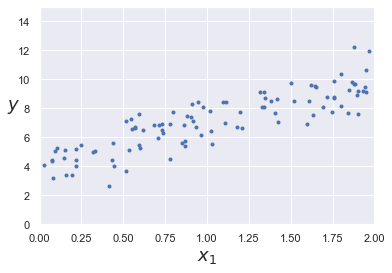

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 1. 선형대수로 예측
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643'>
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/e286875158615d5647351c312f4609a125a5d943'>
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/fb161a08d2371663a73aae304a7ba910b7e9776a'>

array([[4.14310902],
       [2.87783192]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

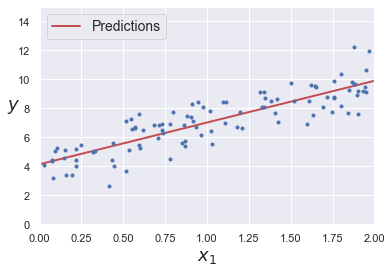

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## 2. Scikit-learn Linear regression API로 예측

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([4.14310902]), array([[2.87783192]]))

## 3. Scikit-learn SGD로 예측

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X[0:3]
X_b[0:3]

array([[1.93385649],
       [0.94804512],
       [0.90242905]])

array([[1.        , 1.93385649],
       [1.        , 0.94804512],
       [1.        , 0.90242905]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

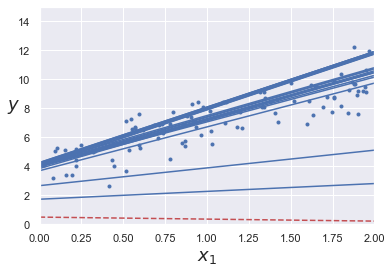

In [8]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

## 3가지 선형모델 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
#df=df.sample(frac=0.1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
df.corr()[-1:]

X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


## 1. Ordinary Least Squares (statisitc models API)

In [34]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00
Time:                        09:22:49   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. Regression (scikit learn API)

In [35]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False) # #print('Intercept: \n', reg.intercept_)

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 3. Stochastic gradient descent

In [13]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=100)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                   #  학습한 모델 내부 저장
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

SGDRegressor(max_iter=100)

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 100,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델의 Mean squared error는 :0.7129


array([ 0.43807757, -0.00732294])

array([0.52882091])

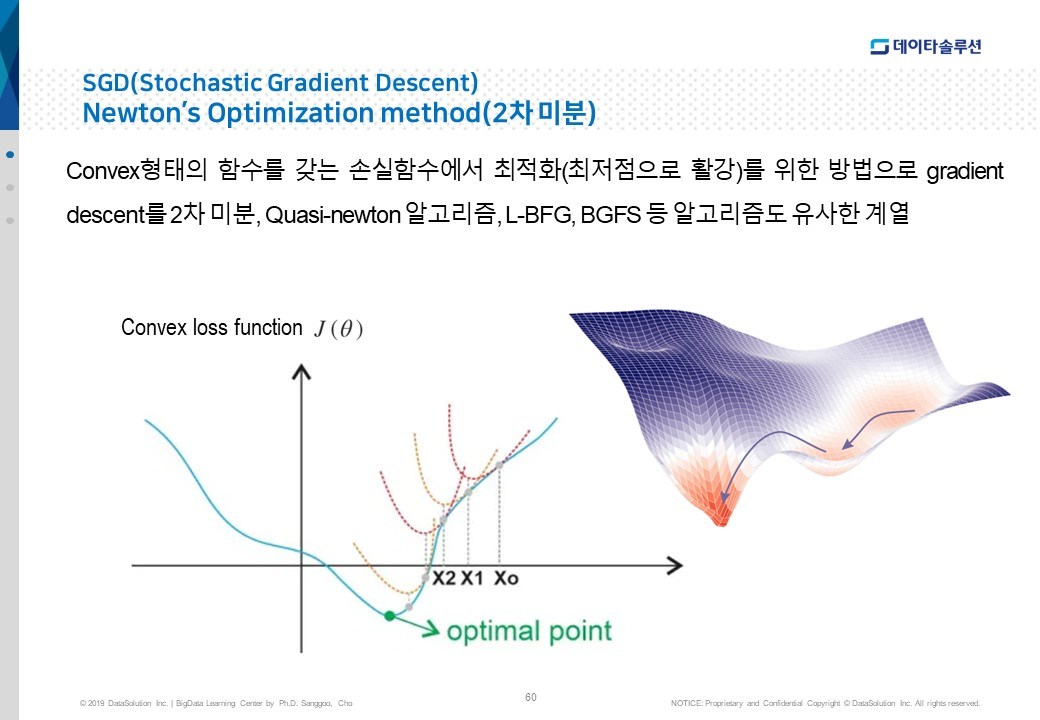

In [47]:
Image(filename='슬라이드60.jpg', width=1000, height=height)

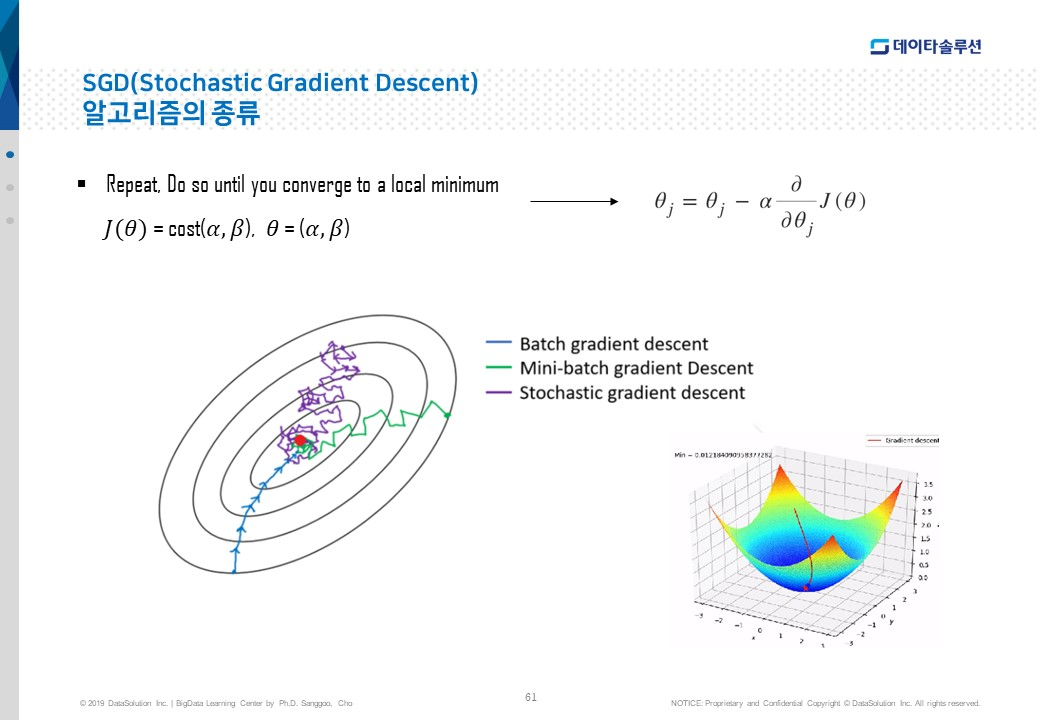

In [48]:
Image(filename='슬라이드61.jpg', width=1000, height=height)

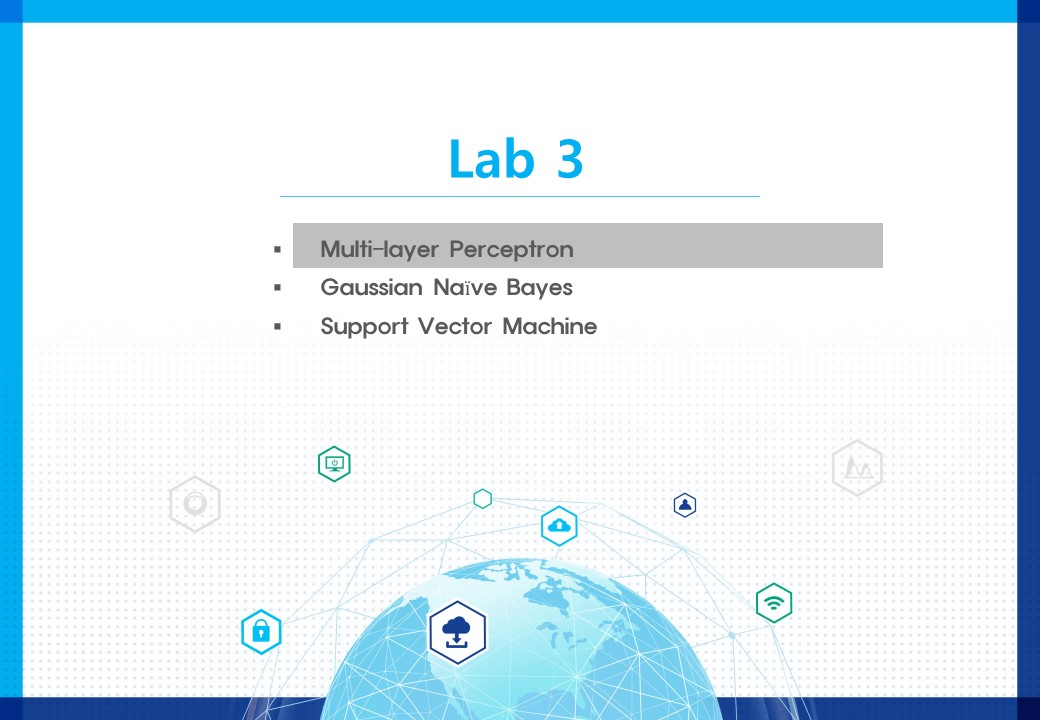

In [37]:
Image(filename='슬라이드62.jpg', width=1000, height=height)

# Multi-layer Perceptron(MLP)
- This model optimizes the log-loss function using LBFGS(Quasi-Newton methods) or stochastic gradient descent.

<img src = 'https://scikit-learn.org/stable/_images/multilayerperceptron_network.png'>

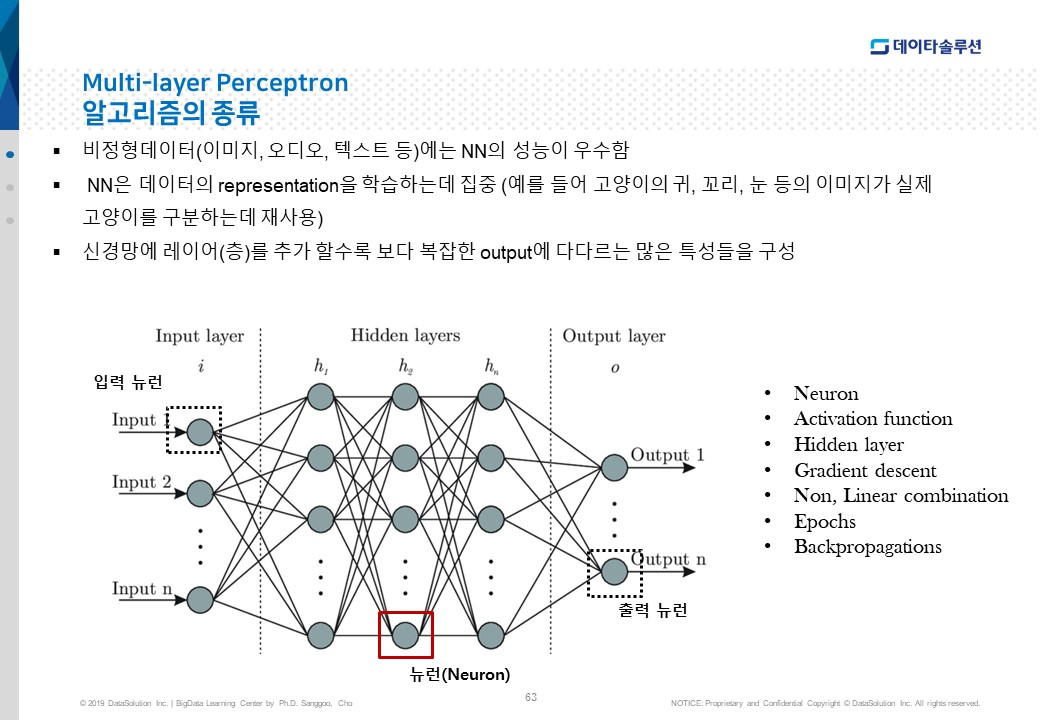

In [38]:
Image(filename='슬라이드63.jpg', width=1000, height=height)

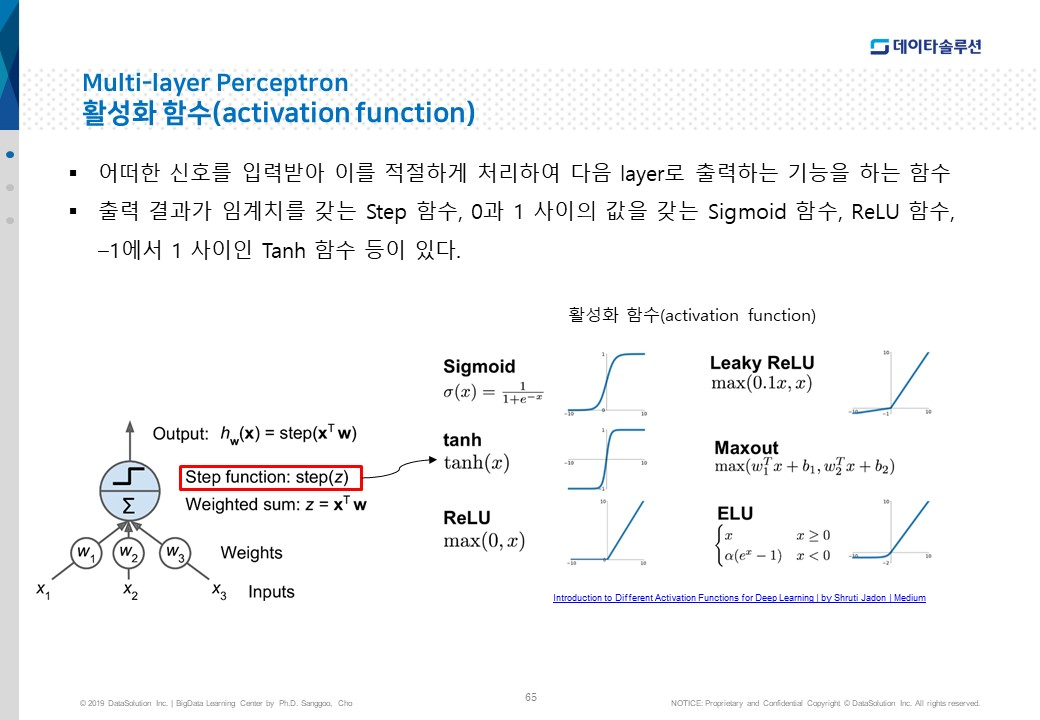

In [39]:
Image(filename='슬라이드65.jpg', width=1000, height=height)

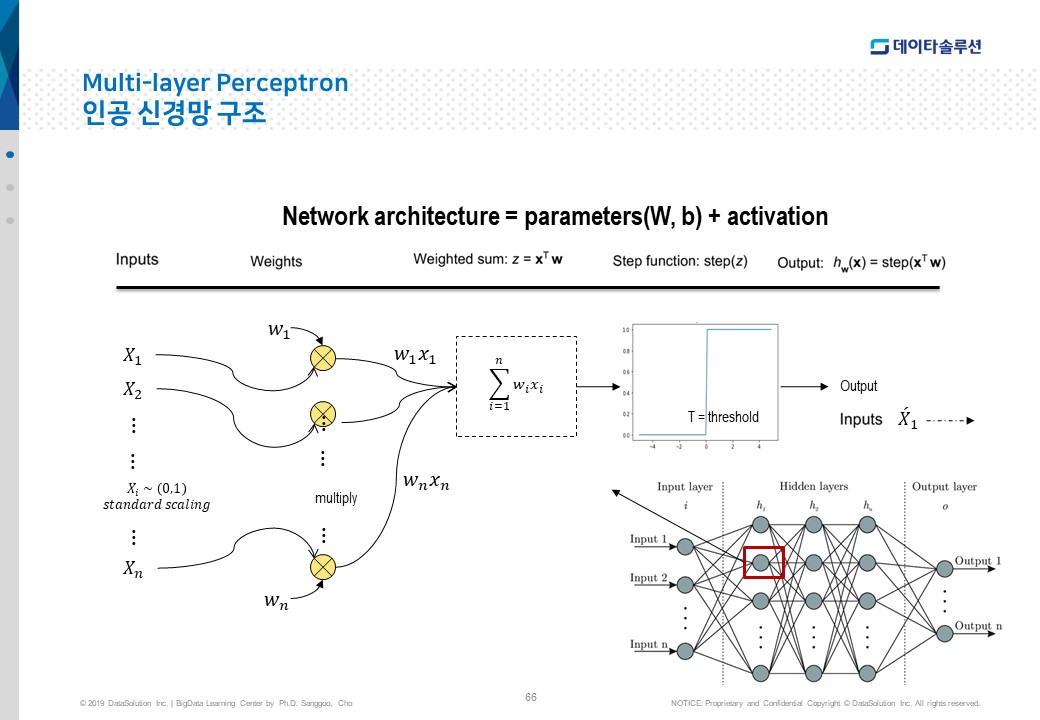

In [40]:
Image(filename='슬라이드66.jpg', width=1000, height=height)

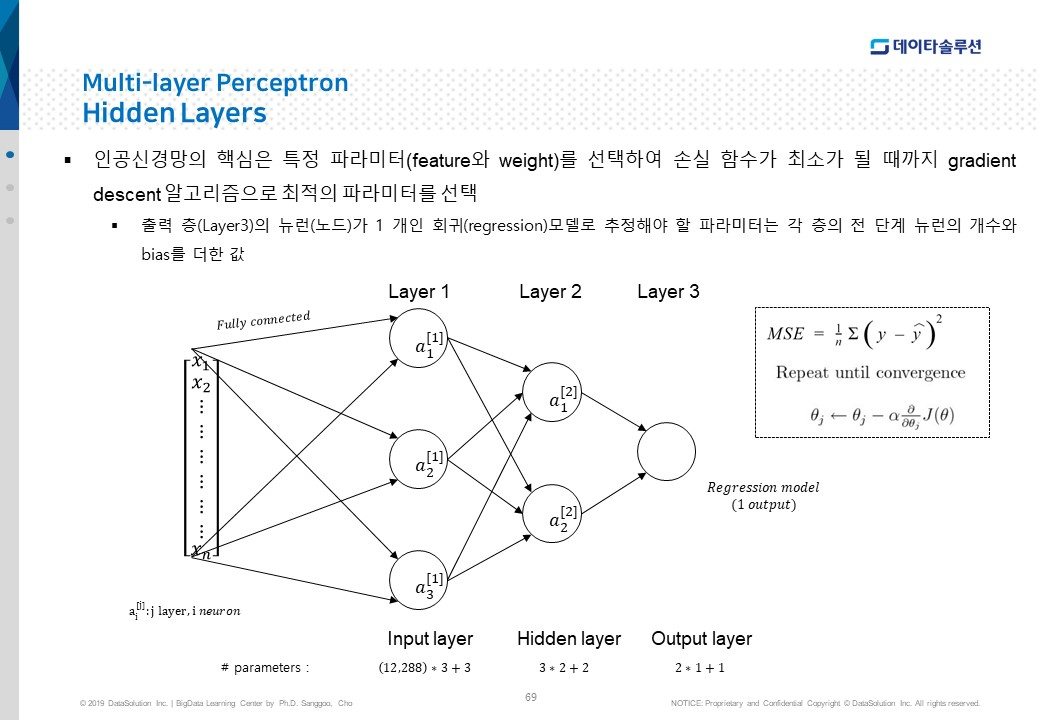

In [41]:
Image(filename='슬라이드69.jpg', width=1000, height=height)

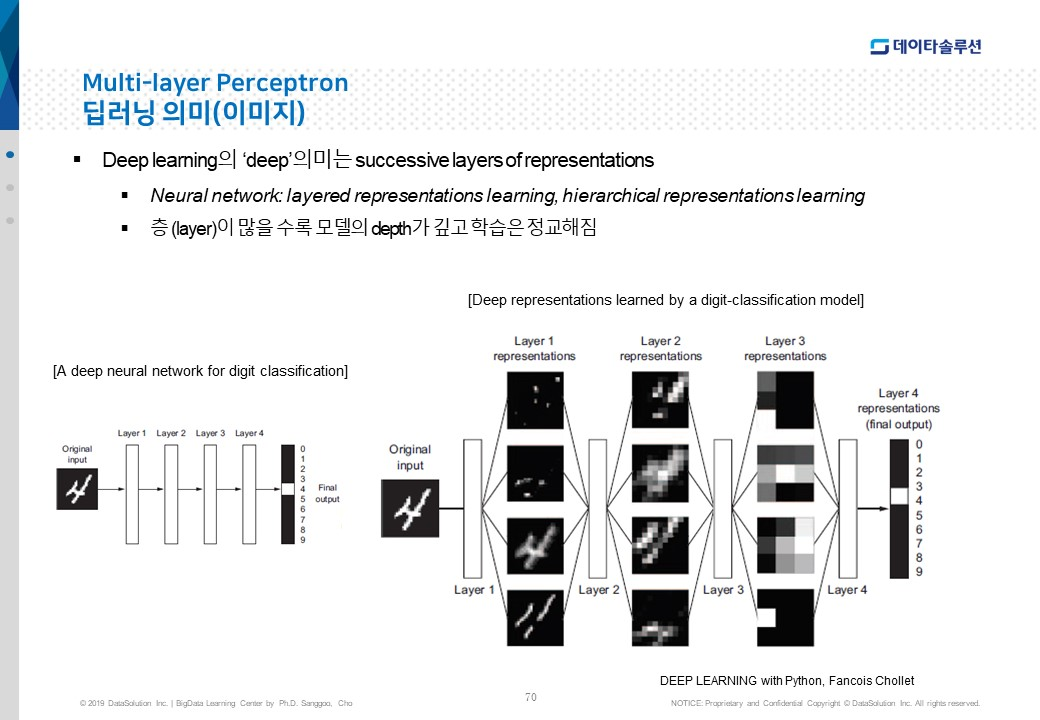

In [42]:
Image(filename='슬라이드70.jpg', width=1000, height=height)

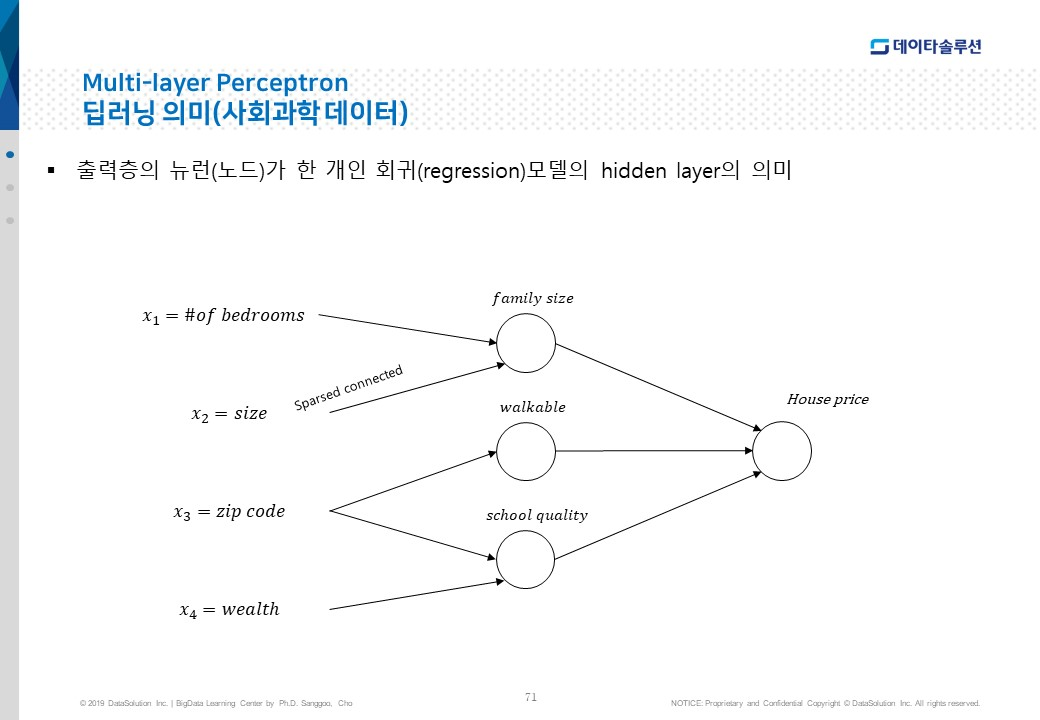

In [43]:
Image(filename='슬라이드71.jpg', width=1000, height=height)

In [14]:
from sklearn.neural_network import MLPRegressor     # 알고리즘 불러오고 데이터 준비하기
model = MLPRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

MLPRegressor(max_iter=500)

모델의 Mean squared error는 :0.6063


In [15]:
from sklearn.neural_network import MLPRegressor     # 알고리즘 불러오고 데이터 준비하기
model = MLPRegressor(max_iter=500, 
                     hidden_layer_sizes = (10, 50, 10))  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

MLPRegressor(hidden_layer_sizes=(10, 50, 10), max_iter=500)

모델의 Mean squared error는 :0.5999


## <font color ='red'> 실습

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X.shape
y

(100, 20)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [18]:
clf = MLPClassifier(random_state=1, max_iter=300)
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

- hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. 
- Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.

- 'hidden_layer_sizes': (150,100,50) 
       * 3개의 hidden layers, 
       * 첫번째/두번째/세번째 layer에는 150개, 100개, 50개의 뉴련(node)

In [19]:
len((150,100,50))
(150,100,50)[0]
len((100,))

3

150

1

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## parameter tuning
## Varying regularization in Multi-layer Perceptron
- A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.
- Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.


<img src ='https://scikit-learn.org/stable/_images/sphx_glr_plot_mlp_alpha_001.png'>

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [20]:
clf.fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

MLPClassifier(max_iter=300, random_state=1)

array([[0.03838405, 0.96161595]])

array([1, 0, 1, 0, 1])

0.88

In [21]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 1), random_state=1).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

array([[0.05125188, 0.94874812]])

array([1, 0, 1, 0, 1])

0.88

In [22]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 10, 10), random_state=1).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

array([[0., 1.]])

array([1, 0, 1, 1, 1])

0.92

# End